In [1]:
!pip install memory_profiler


--- TV Ads Scheduling Result ---
Input Ads: [('Ad1', 2, 60), ('Ad2', 1, 110), ('Ad3', 3, 25), ('Ad4', 2, 45), ('Ad5', 1, 30), ('Ad6', 3, 75), ('Ad7', 2, 55)]
Scheduled slots: [(1, 'Ad2'), (2, 'Ad1'), (3, 'Ad6')]
Chosen ads: [('Ad2', 1, 110), ('Ad6', 3, 75), ('Ad1', 2, 60)]
Total Revenue (₹ lakhs): 245
Time: 0.208458s | Memory used: 0.000000 MB
Time Complexity: O(n log n + n*D)


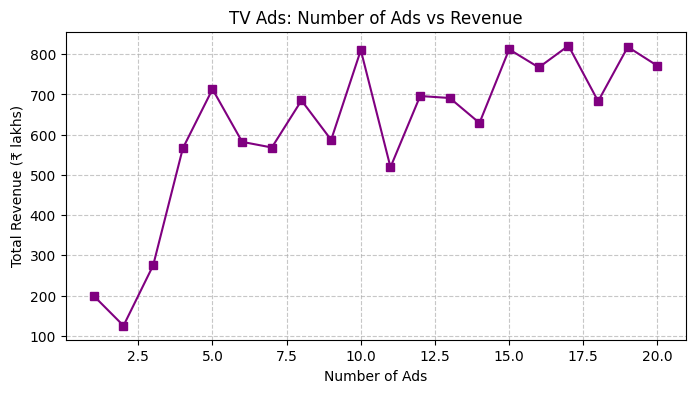

In [2]:
"""
Problem 1: Scheduling TV Ads using Greedy Job Sequencing
"""

import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import numpy as np

def schedule_ads(ad_list):
    max_dead = max(deadline for (_id, deadline, _profit) in ad_list)
    timeline = [None] * (max_dead + 1)
    ads_sorted = sorted(ad_list, key=lambda x: x[2], reverse=True)
    chosen_ads = []
    total_profit = 0
    for ad in ads_sorted:
        ad_id, deadline, profit = ad
        for t in range(min(deadline, max_dead), 0, -1):
            if timeline[t] is None:
                timeline[t] = ad_id
                chosen_ads.append(ad)
                total_profit += profit
                break
    scheduled_slots = [(t, timeline[t]) for t in range(1, len(timeline)) if timeline[t] is not None]
    return scheduled_slots, chosen_ads, total_profit

# --- Sample Ads Data ---
ads_list = [
    ("Ad1", 2, 60),
    ("Ad2", 1, 110),
    ("Ad3", 3, 25),
    ("Ad4", 2, 45),
    ("Ad5", 1, 30),
    ("Ad6", 3, 75),
    ("Ad7", 2, 55),
]

# --- Profiling Time & Memory ---
start_time = time.time()
mem_before = max(memory_usage(-1, interval=0.01, timeout=0.1))
slots, chosen, revenue = schedule_ads(ads_list)
mem_after = max(memory_usage(-1, interval=0.01, timeout=0.1))
end_time = time.time()

print("\n--- TV Ads Scheduling Result ---")
print("Input Ads:", ads_list)
print("Scheduled slots:", slots)
print("Chosen ads:", chosen)
print("Total Revenue (₹ lakhs):", revenue)
print(f"Time: {end_time-start_time:.6f}s | Memory used: {mem_after-mem_before:.6f} MB")
print("Time Complexity: O(n log n + n*D)")

# --- Visualization: Number of Ads vs Revenue ---
np.random.seed(42)
num_ads = list(range(1, 21))  # 1 to 20 ads
profits = []
for n in num_ads:
    test_ads = [(f"Ad{i}", np.random.randint(1, 5), np.random.randint(20, 220)) for i in range(n)]
    _, _, profit = schedule_ads(test_ads)
    profits.append(profit)

plt.figure(figsize=(8, 4))
plt.plot(num_ads, profits, marker='s', color='purple')
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue (₹ lakhs)")
plt.title("TV Ads: Number of Ads vs Revenue")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



--- 0/1 Knapsack Result ---
Weights        : [12, 25, 33, 45, 8]
Values         : [70, 120, 130, 250, 25]
Budget         : 55
Maximum Profit : 275
Selected Items : [3, 4]
Time: 0.211067s | Memory used: 0.000000 MB
Time Complexity: O(n*W), Space Complexity: O(n*W)


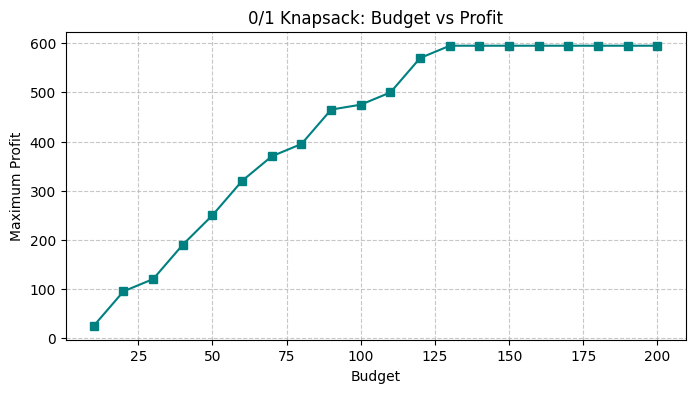

In [3]:
"""
Problem 2: Maximizing Profit with Limited Budget
Algorithmic Strategy: Dynamic Programming (0/1 Knapsack)
"""

import matplotlib.pyplot as plt
import numpy as np
import time
from memory_profiler import memory_usage

def knapsack_dp(weights_list, values_list, max_capacity):
    num_items = len(weights_list)
    dp_table = [[0] * (max_capacity + 1) for _ in range(num_items + 1)]

    for i in range(1, num_items + 1):
        w, v = weights_list[i-1], values_list[i-1]
        for cap in range(max_capacity + 1):
            if w <= cap:
                dp_table[i][cap] = max(dp_table[i-1][cap], dp_table[i-1][cap-w] + v)
            else:
                dp_table[i][cap] = dp_table[i-1][cap]

    # Backtracking to find selected items
    res = dp_table[num_items][max_capacity]
    selected_items = []
    remaining = max_capacity
    for i in range(num_items, 0, -1):
        if dp_table[i][remaining] != dp_table[i-1][remaining]:
            selected_items.append(i-1)
            remaining -= weights_list[i-1]
    selected_items.reverse()
    return res, selected_items

# --- Input Data ---
weights_list = [12, 25, 33, 45, 8]
values_list = [70, 120, 130, 250, 25]
budget = 55

# --- Profiling ---
start_time = time.time()
mem_before = max(memory_usage(-1, interval=0.01, timeout=0.1))
max_profit, chosen_indices = knapsack_dp(weights_list, values_list, budget)
mem_after = max(memory_usage(-1, interval=0.01, timeout=0.1))
end_time = time.time()

print("\n--- 0/1 Knapsack Result ---")
print("Weights        :", weights_list)
print("Values         :", values_list)
print("Budget         :", budget)
print("Maximum Profit :", max_profit)
print("Selected Items :", chosen_indices)
print(f"Time: {end_time-start_time:.6f}s | Memory used: {mem_after-mem_before:.6f} MB")
print("Time Complexity: O(n*W), Space Complexity: O(n*W)")

# --- Visualization: Budget vs Profit ---
np.random.seed(5)
budgets = list(range(10, 210, 10))
profits = []
for b in budgets:
    res, _ = knapsack_dp(weights_list, values_list, b)
    profits.append(res)

plt.figure(figsize=(8, 4))
plt.plot(budgets, profits, marker='s', color='teal')
plt.xlabel("Budget")
plt.ylabel("Maximum Profit")
plt.title("0/1 Knapsack: Budget vs Profit")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [4]:
!pip install memory_profiler

In [5]:
"""
Problem 3: Sudoku Solver using Backtracking
"""

import time
from memory_profiler import memory_usage
import copy

def is_safe(grid, row, col, num):
    # Check row
    if num in grid[row]:
        return False
    # Check column
    if num in [grid[i][col] for i in range(9)]:
        return False
    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if grid[i][j] == num:
                return False
    return True

def find_unassigned(grid):
    for r in range(9):
        for c in range(9):
            if grid[r][c] == 0:
                return r, c
    return None

def solve_sudoku(grid, depth=0, max_depth=[0]):
    if depth > max_depth[0]:
        max_depth[0] = depth
    empty_cell = find_unassigned(grid)
    if not empty_cell:
        return True
    r, c = empty_cell
    for val in range(1, 10):
        if is_safe(grid, r, c, val):
            grid[r][c] = val
            if solve_sudoku(grid, depth+1, max_depth):
                return True
            grid[r][c] = 0
    return False

# --- Sample Sudoku Puzzle ---
puzzle = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]

board = copy.deepcopy(puzzle)
max_recursion = [0]

# --- Profiling ---
start_time = time.time()
mem_before = max(memory_usage(-1, interval=0.01, timeout=0.1))
solve_sudoku(board, 0, max_recursion)
mem_after = max(memory_usage(-1, interval=0.01, timeout=0.1))
end_time = time.time()

# --- Output ---
print("\n--- Sudoku Solver Result ---")
for row in board:
    print(row)
print(f"Time taken      : {end_time-start_time:.6f}s")
print(f"Memory used     : {mem_after-mem_before:.6f} MB")
print(f"Max recursion depth observed: {max_recursion[0]}")
print("Complexity: Worst-case O(9^k), k = number of empty cells; stack usage = recursion depth")



--- Sudoku Solver Result ---
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]
Time taken      : 0.237485s
Memory used     : 0.000000 MB
Max recursion depth observed: 51
Complexity: Worst-case O(9^k), k = number of empty cells; stack usage = recursion depth
